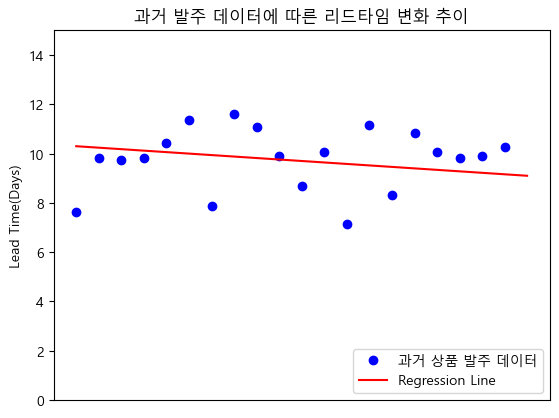

In [24]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
x = range(20)
y = tf.random.uniform([20],7,12)
plt.rc('font', family='Malgun Gothic')
plt.plot(x,y, 'bo', label='과거 상품 발주 데이터')
plt.title("과거 발주 데이터에 따른 리드타임 변화 추이")
line_x = np.arange(0, 20, 0.01)
line_y = (-0.06) * line_x + 10.3
plt.plot(line_x,line_y,'r-', label='Regression Line')

plt.gca(). axes.xaxis.set_visible(False)
# plt.xlabel('과거 발주')
plt.ylabel('Lead Time(Days)')
# plt.axis('off')
plt.ylim(0,15)

plt.legend(loc='lower right')
plt.show()



In [11]:
import pandas as pd
import numpy as np
df_raw = pd.read_csv('../data/raw.csv')

In [21]:
df_raw.loc[24600 : 24666]

Assembly Control No.  D/T              Machinery   
24600  FIG.36 FUEL INJECTION PUMP   22-03-065    5     7M NET BOAT ENGINE  \
24601             FIG.37 GOVERNOR   22-03-065    5     7M NET BOAT ENGINE   
24602  FIG.36 FUEL INJECTION PUMP   22-03-065    5     7M NET BOAT ENGINE   
24603  FIG.36 FUEL INJECTION PUMP   22-03-065    5     7M NET BOAT ENGINE   
24604  FIG.36 FUEL INJECTION PUMP   22-03-065    5     7M NET BOAT ENGINE   
...                           ...         ...  ...                    ...   
24662     342-0537 GENERATOR GP-E         NaN   50  NO.3 GENERATOR ENGINE   
24663     342-0537 GENERATOR GP-E         NaN   50  NO.3 GENERATOR ENGINE   
24664     342-0537 GENERATOR GP-E         NaN   50  NO.3 GENERATOR ENGINE   
24665     342-0537 GENERATOR GP-E         NaN   50  NO.3 GENERATOR ENGINE   
24666                         NaN         NaN  NaN                    NaN   

        No.     Part No.1                               Subject          견적   
24600   9.0  136600-42480   7M NET BOAT INJECTION PUMP PARTS 외   2022-03-25  \
24601  10.0  122710-51080   7M NET BOAT INJECTION PUMP PARTS 외   2022-03-25   
24602  11.0  127692-51142   7M NET BOAT INJECTION PUMP PARTS 외   2022-03-25   
24603  12.0  152673-51360   7M NET BOAT INJECTION PUMP PARTS 외   2022-03-25   
24604  13.0  127695-51420   7M NET BOAT INJECTION PUMP PARTS 외   2022-03-25   
...     ...           ...                                   ...         ...   
24662  14.0      339-2079  상가수리 대비 #1~3 AUX ENG GENERATOR 수리 파트  2022-06-17   
24663  15.0      317-3717  상가수리 대비 #1~3 AUX ENG GENERATOR 수리 파트  2022-06-17   
24664  16.0      253-9789  상가수리 대비 #1~3 AUX ENG GENERATOR 수리 파트  2022-06-17   
24665  17.0      253-9792  상가수리 대비 #1~3 AUX ENG GENERATOR 수리 파트  2022-06-17   
24666   NaN           NaN                                   NaN         NaN   

            견적단가  견적수량  ... 입고창고        창고입고  창고입고수량        창고출고  창고출고수량   
24600      140.0   1.0  ...   BW  2022-03-31     1.0  2022-03-31     1.0  \
24601      220.0   1.0  ...   BW  2022-03-31     1.0  2022-03-31     1.0   
24602      200.0  18.0  ...   BW  2022-03-31    18.0  2022-03-31    18.0   
24603      140.0  12.0  ...   BW  2022-03-31    12.0  2022-03-31    12.0   
24604      300.0   6.0  ...   BW  2022-03-31     6.0  2022-03-31     6.0   
...          ...   ...  ...  ...         ...     ...         ...     ...   
24662   119110.0   2.0  ...  NaN         NaN     0.0         NaN     0.0   
24663   840490.0   1.0  ...  NaN         NaN     0.0         NaN     0.0   
24664   611770.0   1.0  ...  NaN         NaN     0.0         NaN     0.0   
24665  1577790.0   1.0  ...  NaN         NaN     0.0         NaN     0.0   
24666        NaN   NaN  ...  NaN         NaN     NaN         NaN     NaN   

        청구량               청구서번호                 청구품목 출고선박                출고운반선  
24600   1.0  BON-SE-ESP-2203012   OIL SEAL TC304508   BON  POKO 전달(JUB 상가시 사용)  
24601   1.0  BON-SE-ESP-2203012  SEAL, AC0735-E00X9   BON  POKO 전달(JUB 상가시 사용)  
24602  18.0  BON-SE-ESP-2203012          O-RING,P21   BON  POKO 전달(JUB 상가시 사용)  
24603  12.0  BON-SE-ESP-2203012              O-RING   BON  POKO 전달(JUB 상가시 사용)  
24604   6.0  BON-SE-ESP-2203012              O-RING   BON  POKO 전달(JUB 상가시 사용)  
...     ...                 ...                  ...  ...                  ...  
24662   2.0  BON-SE-ESP-2206004       RING-RETAINING  NaN                  NaN  
24663   1.0  BON-SE-ESP-2206004       SLEEVE-BEARING  NaN                  NaN  
24664   1.0  BON-SE-ESP-2206004         BEARING-BALL  NaN                  NaN  
24665   1.0  BON-SE-ESP-2206004     BEARING-BALL DE   NaN                  NaN  
24666   NaN                 NaN                  NaN  NaN                  NaN  

[67 rows x 27 columns]

In [14]:
df_raw.columns

Index(['Assembly', 'Control No.', 'D/T', 'Machinery', 'No.', 'Part No.1',
       'Subject', '견적', '견적단가', '견적수량', '견적화폐', '발주', '발주금액', '발주번호', '발주수량',
       '발주처', '선박입고수량', '입고창고', '창고입고', '창고입고수량', '창고출고', '창고출고수량', '청구량',
       '청구서번호', '청구품목', '출고선박', '출고운반선'],
      dtype='object')

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
df = pd.read_csv('../data/raw_postpro.csv', encoding='cp949')

In [8]:
df.columns

Index(['청구서번호', 'No.', 'Subject', 'Machinery', 'Assembly', '청구품목', 'Part No.1',
       'Part No.2', 'key1', 'key2', '리드타임_음수제거', '청구량', '견적', '견적수량', '견적화폐',
       '견적단가', '발주번호', '발주처', '발주', '발주수량', '발주금액', 'D/T', '미입고 기간', '리드타임',
       '창고입고', '창고입고수량', 'Control No.', '입고창고', '창고출고', '창고출고수량', '출고선박',
       '출고운반선', '선박입고', '선박입고수량', '완료 여부'],
      dtype='object')

In [5]:
df.head(2)

청구서번호  No.                               Subject   
0  ELS-BS-ESP-2004002   12          NO.1 A/E C18 MAJOR O/H PARTS  \
1  OCA-BS-ESP-2010004    5  운전시간 대비 #2 AUX ENG TOP END O/H PARTS   

               Machinery                 Assembly                청구품목   
0  NO.1 GENERATOR ENGINE  323-6480 LINES GP-FUEL     SEAL-O-RING-STOR  \
1  NO.2 GENERATOR ENGINE               GASKET KIT  OIL COOLER & LINES   

   Part No.1 Part No.2       key1    key2  ...  창고입고수량  Control No. 입고창고   
0  7.00E-275         0  7.00E-275  COOLER  ...       1        혜인 발주   BS  \
1  7.00E-275         0  7.00E-275  COOLER  ...       1        혜인 발주   BS   

         창고출고 창고출고수량  출고선박  출고운반선 선박입고 선박입고수량  완료 여부  
0  2020-09-19      1   BLO  본선 선적    0      0      0  
1  2020-09-18      1   JBG  본선 선적    0      0      0  

[2 rows x 35 columns]

In [2]:
df1 = df[["Assembly" ,"key2", "발주처","청구품목", '리드타임',"Machinery" ,"Part No.1"]].copy()
# 여러 컬럼명 변경
df1.rename(columns={'청구품목': 'item', '발주처': 'company', 'Part No.1': 'partNo1',"리드타임" : "leadtime", "key2" : "category"}, inplace=True)

In [3]:
df1

Assembly  category   
0                   323-6480 LINES GP-FUEL     COOLER  \
1                                GASKET KIT    COOLER   
2                 285-8374 MANIFOLD GP-EXH     COOLER   
3                         159-8828 TURBO GP    COOLER   
4                 2N4727 INSTRUMNT PANEL GP    COOLER   
...                                     ...       ...   
20512  5-753-2E_BOAT DAVIT & N.D CRANE LINE  CYLINDER   
20513  5-753-2E_BOAT DAVIT & N.D CRANE LINE  CYLINDER   
20514                       ELECTRIC CLUTCH      BELT   
20515        HAND HYDRAULIC STEERING SYSTEM  CYLINDER   
20516        HAND HYDRAULIC STEERING SYSTEM  CYLINDER   

                                company                                 item   
0              HAEIN Coporation_Cheonan                     SEAL-O-RING-STOR  \
1              HAEIN Coporation_Cheonan                   OIL COOLER & LINES   
2              HAEIN Coporation_Cheonan                               WASHER   
3              HAEIN Coporation_Cheonan                       BOLT-HIGH TEMP   
4              HAEIN Coporation_Cheonan                                 SEAL   
...                                 ...                                  ...   
20512          MARINE HYDROTEC CO.,LTD.         HYD. CYLINDER_NET BOAT DAVIT   
20513          MARINE HYDROTEC CO.,LTD.  HYD. CYLINDER_N.D CRANE_BOOM_LIFTER   
20514  PORT RELIEF ENGINEERING CO.,LTD.                                PULLY   
20515  PORT RELIEF ENGINEERING CO.,LTD.                            CYLINDER    
20516  PORT RELIEF ENGINEERING CO.,LTD.                SEAL KIT FOR CYLINDER   

       leadtime              Machinery                       partNo1  
0           194  NO.1 GENERATOR ENGINE                     7.00E-275  
1            59  NO.2 GENERATOR ENGINE                     7.00E-275  
2            61  NO.2 GENERATOR ENGINE                     7.00E-275  
3           212  NO.1 GENERATOR ENGINE                     7.00E-275  
4           220  NO.1 GENERATOR ENGINE                     7.00E-275  
...         ...                    ...                           ...  
20512        95            HYD. SYSTEM            φ150 × φ85 × 695st  
20513        67            HYD. SYSTEM          φ160 × φ112 × 1130st  
20514        25            6M NET BOAT                     Φ305X5V-3  
20515        25            7M NET BOAT           Φ50 x S195 CYLINDER  
20516        25            7M NET BOAT  Φ50 x S195 CYLINDER SEAL KIT  

[20517 rows x 7 columns]